# Device Metrics Analysis

This notebook analyzes the `device_metrics.csv` file containing solar inverter performance data.

## Dataset Overview
- **File**: device_metrics.csv
- **Size**: Large dataset with over 3.3 million rows
- **Content**: Solar inverter metrics and performance data

## Key Columns
- `device_id`: Unique identifier for each device
- `device_name`: Human-readable device name
- `device_type`: Type of device (e.g., Inverter)
- `site_id`: Site identifier
- `site_name`: Site name
- `site_latitude/site_longitude`: Geographic coordinates
- `site_ac_capacity`: AC capacity of the site
- `event_utc_time/event_local_time`: Timestamps
- `metric`: Type of measurement
- `value`: Measured value


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Libraries imported successfully!")


Libraries imported successfully!


## 1. Data Loading and Initial Exploration


In [4]:
# Load the dataset
print("Loading device_metrics.csv...")
df = pd.read_csv('device_metrics/device_metrics.csv')
print(f"Dataset loaded successfully!")
print(f"Shape: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


Loading device_metrics.csv...
Dataset loaded successfully!
Shape: (3311791, 12)
Memory usage: 1862.85 MB


In [5]:
# Display basic information about the dataset
print("Dataset Info:")
print("=" * 50)
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3311791 entries, 0 to 3311790
Data columns (total 12 columns):
 #   Column            Dtype  
---  ------            -----  
 0   device_id         object 
 1   device_name       object 
 2   device_type       object 
 3   site_id           object 
 4   site_name         object 
 5   site_latitude     float64
 6   site_longitude    float64
 7   site_ac_capacity  float64
 8   event_utc_time    object 
 9   event_local_time  object 
 10  metric            object 
 11  value             float64
dtypes: float64(4), object(8)
memory usage: 303.2+ MB


In [6]:
# Display first few rows
print("First 10 rows:")
print("=" * 50)
df.head(10)


First 10 rows:


,device_id,device_name,device_type,site_id,site_name,site_latitude,site_longitude,site_ac_capacity,event_utc_time,event_local_time,metric,value
0,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-26T00:50:00.000Z,2025-06-25T17:50:00.000Z,AC_POWER_ASBUILT.EXPECTED_ASTM4,2778.00270
1,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-25T17:10:00.000Z,2025-06-25T10:10:00.000Z,AC_POWER_ASBUILT_UNCLIP.EXPECTED,3554.22850
2,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-26T06:50:00.000Z,2025-06-25T23:50:00.000Z,AC_VOLTAGE_HI_SETPOINT.MEASURED,105.00000
3,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-25T21:50:00.000Z,2025-06-25T14:50:00.000Z,ENERGYLOSS_RESIDUAL.CALCULATED,0.00000
4,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-26T01:50:00.000Z,2025-06-25T18:50:00.000Z,PERFORMANCE_INDEX.CALCULATED,106.55828
5,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-26T06:45:00.000Z,2025-06-25T23:45:00.000Z,POWER_FACTOR.MEASURED,0.00000
6,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-26T00:10:00.000Z,2025-06-25T17:10:00.000Z,AC_POWER.EXPECTED,3049.13040
7,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-25T18:20:00.000Z,2025-06-25T11:20:00.000Z,AC_POWER_ASBUILT_UNCLIP.EXPECTED,3544.46360
8,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-25T20:40:00.000Z,2025-06-25T13:40:00.000Z,AC_POWER_ASBUILT_UNCLIP.EXPECTED,3456.21950
9,2009.21.001.BLK02.PAD03.INV01,INV 59,Inverter,2009.21.001,Slate BART,36.226944,-119.893889,50496.0,2025-06-25T22:10:00.000Z,2025-06-25T15:10:00.000Z,AC_POWER_ASBUILT_UNCLIP.EXPECTED,3396.07670


In [7]:
# Check for missing values
print("Missing values per column:")
print("=" * 50)
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    print(missing_df)
else:
    print("No missing values found!")


Missing values per column:
             Missing Count  Missing Percentage
device_name            571            0.017241
value                31559            0.952928


## 2. Data Preprocessing


In [8]:
# Convert timestamp columns to datetime
print("Converting timestamp columns...")
df['event_utc_time'] = pd.to_datetime(df['event_utc_time'])
df['event_local_time'] = pd.to_datetime(df['event_local_time'])

# Extract date and time components
df['date'] = df['event_utc_time'].dt.date
df['hour'] = df['event_utc_time'].dt.hour
df['day_of_week'] = df['event_utc_time'].dt.day_name()
df['month'] = df['event_utc_time'].dt.month
df['year'] = df['event_utc_time'].dt.year

print("Timestamp conversion completed!")


Converting timestamp columns...
Timestamp conversion completed!


## 3. Exploratory Data Analysis


In [9]:
# Basic statistics for numerical columns
print("Numerical columns statistics:")
print("=" * 50)
numerical_cols = ['site_latitude', 'site_longitude', 'site_ac_capacity', 'value']
df[numerical_cols].describe()


Numerical columns statistics:


,site_latitude,site_longitude,site_ac_capacity,value
count,3.311791e+06,3.311791e+06,3311791.0,3.280232e+06
mean,3.622694e+01,-1.198939e+02,50496.0,1.537759e+06
std,4.222756e-10,5.922943e-09,0.0,4.544096e+07
min,3.622694e+01,-1.198939e+02,50496.0,-9.371520e+03
25%,3.622694e+01,-1.198939e+02,50496.0,0.000000e+00
50%,3.622694e+01,-1.198939e+02,50496.0,3.900000e+01
75%,3.622694e+01,-1.198939e+02,50496.0,4.937284e+02
max,3.622694e+01,-1.198939e+02,50496.0,2.548010e+09


In [10]:
# Unique values in categorical columns
print("Unique values in categorical columns:")
print("=" * 50)
categorical_cols = ['device_type', 'site_name', 'metric']

for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Top 10 values:")
    print(df[col].value_counts().head(10))


Unique values in categorical columns:

device_type:
Unique values: 20
Top 10 values:
device_type
Inverter Module             1754112
Inverter                     895456
Combiner                     283216
Tracker                      118197
Meter                        101023
TCU                           34260
Sensor Anemometer             20556
Sensor Pyranometer Rear       20556
Sensor Wind Direction         13704
Sensor Temperature T_AMB      10278
Name: count, dtype: int64

site_name:
Unique values: 1
Top 10 values:
site_name
Slate BART    3311791
Name: count, dtype: int64

metric:
Unique values: 185
Top 10 values:
metric
HEARTBEAT.MEASURED           274651
DC_CURRENT.MEASURED          205560
ENERGY_DELIVERED.MAX          66236
AC_CURRENT_C.MEASURED         66236
AC_CURRENT_B.MEASURED         66236
ENERGY_DELIVERED.MIN          66236
AC_CURRENT_A.MEASURED         66236
AC_POWER.MEASURED             66236
VAR.MEASURED                  66236
ENERGY_DELIVERED.MEASURED     66232
Name:

In [11]:
# Time range analysis
print("Time Range Analysis:")
print("=" * 50)
print(f"Start date: {df['event_utc_time'].min()}")
print(f"End date: {df['event_utc_time'].max()}")
print(f"Total time span: {df['event_utc_time'].max() - df['event_utc_time'].min()}")

# Data points per day
daily_counts = df.groupby(df['event_utc_time'].dt.date).size()
print(f"\nAverage data points per day: {daily_counts.mean():.2f}")
print(f"Min data points per day: {daily_counts.min()}")
print(f"Max data points per day: {daily_counts.max()}")


Time Range Analysis:
Start date: 2025-06-25 07:00:00+00:00
End date: 2025-06-27 06:55:00+00:00
Total time span: 1 days 23:55:00

Average data points per day: 1103930.33
Min data points per day: 458191
Max data points per day: 1670400


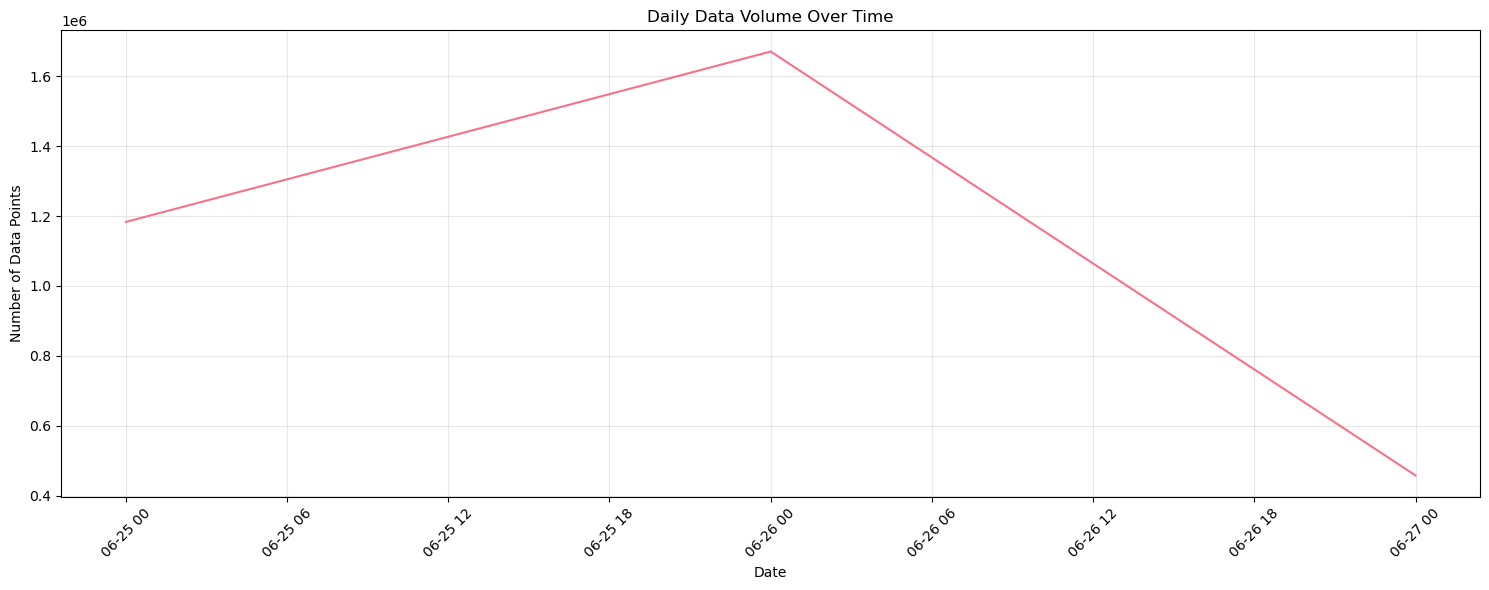

In [12]:
# Plot daily data volume
plt.figure(figsize=(15, 6))
daily_counts.plot(kind='line')
plt.title('Daily Data Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Data Points')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


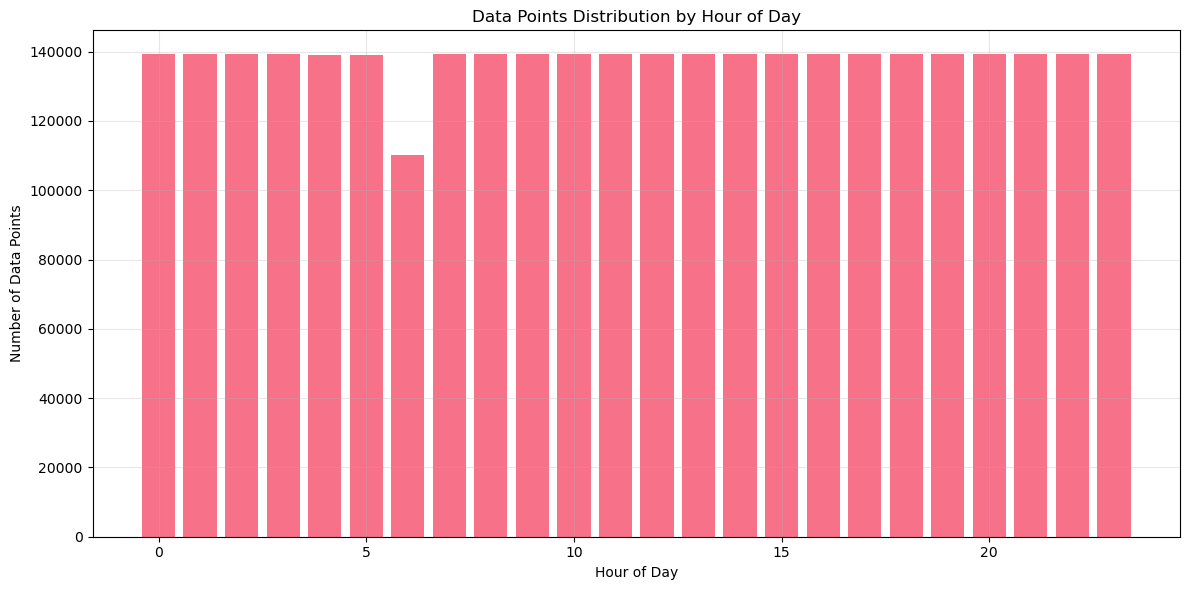

In [13]:
# Hourly distribution
plt.figure(figsize=(12, 6))
hourly_counts = df['hour'].value_counts().sort_index()
plt.bar(hourly_counts.index, hourly_counts.values)
plt.title('Data Points Distribution by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Data Points')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 4. Metrics Analysis


In [14]:
# Analyze different metrics
print("Metrics Analysis:")
print("=" * 50)

# Get top metrics by frequency
metric_counts = df['metric'].value_counts()
print(f"Total unique metrics: {len(metric_counts)}")
print(f"\nTop 20 most frequent metrics:")
print(metric_counts.head(20))


Metrics Analysis:
Total unique metrics: 185

Top 20 most frequent metrics:
metric
HEARTBEAT.MEASURED               274651
DC_CURRENT.MEASURED              205560
ENERGY_DELIVERED.MAX              66236
AC_CURRENT_C.MEASURED             66236
AC_CURRENT_B.MEASURED             66236
ENERGY_DELIVERED.MIN              66236
AC_CURRENT_A.MEASURED             66236
AC_POWER.MEASURED                 66236
VAR.MEASURED                      66236
ENERGY_DELIVERED.MEASURED         66232
DC_VOLTAGE_P.MEASURED             63952
AC_POWER.MAX                      63952
DC_VOLTAGE_N.MEASURED             63952
HW_VERSION.MEASURED               63952
DC_VOLTAGE.MEASURED               63952
T_AMB.MEASURED                    58242
T_A2.MEASURED                     54816
ENERGY_CURRENT_MONTH.MEASURED     54816
ENERGY_DAY.MEASURED               54816
ENERGY_LAST_MONTH.MEASURED        54816
Name: count, dtype: int64


In [15]:
# Analyze metric categories
print("Metric Categories Analysis:")
print("=" * 50)

# Extract metric categories (before the first dot)
df['metric_category'] = df['metric'].str.split('.').str[0]
category_counts = df['metric_category'].value_counts()

print(f"Total metric categories: {len(category_counts)}")
print(f"\nTop 15 metric categories:")
print(category_counts.head(15))


Metric Categories Analysis:
Total metric categories: 166

Top 15 metric categories:
metric_category
HEARTBEAT           274651
DC_CURRENT          205560
ENERGY_DELIVERED    198704
AC_POWER            139340
AC_CURRENT_A         66236
AC_CURRENT_C         66236
AC_CURRENT_B         66236
VAR                  66236
HW_VERSION           63952
DC_VOLTAGE_P         63952
DC_VOLTAGE           63952
DC_VOLTAGE_N         63952
T_AMB                58242
T_A3                 54816
T_B1                 54816
Name: count, dtype: int64


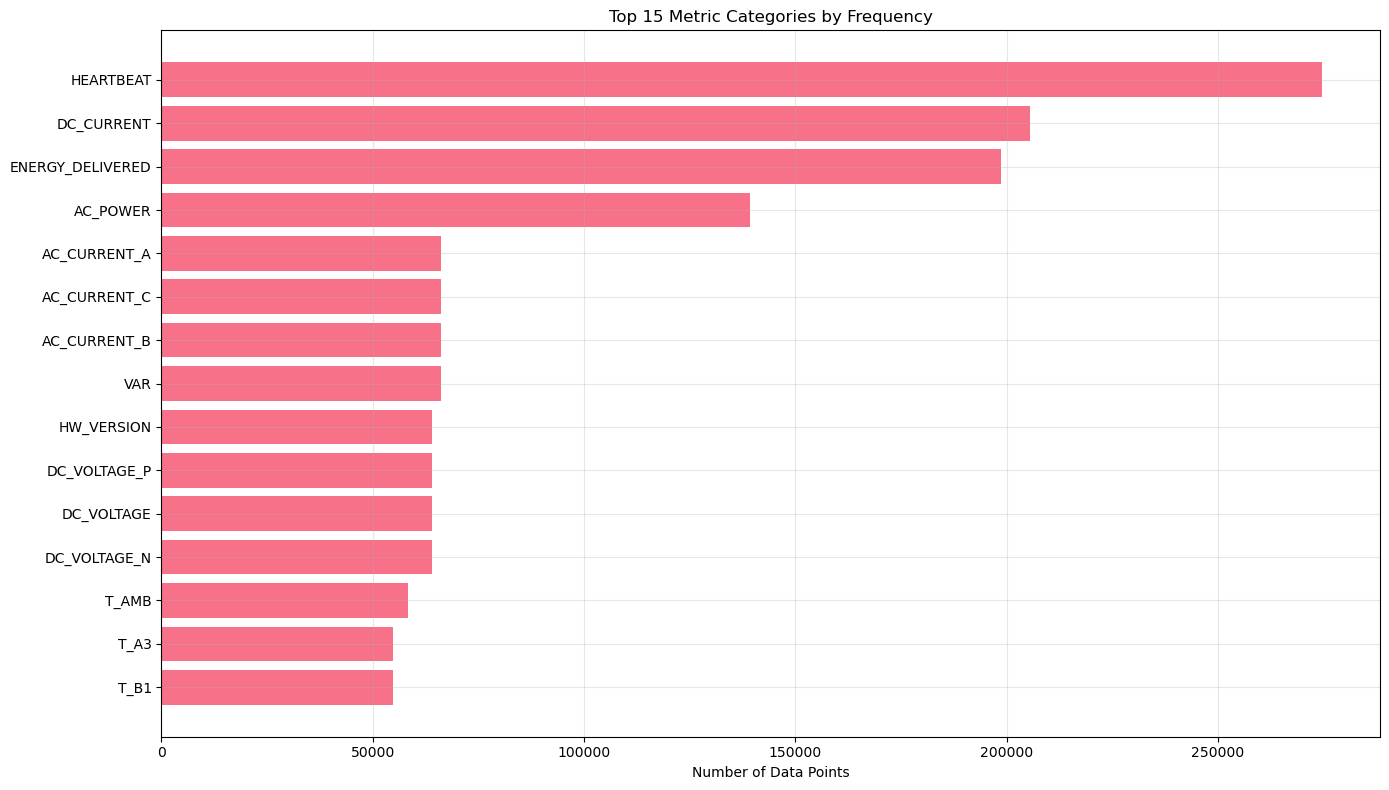

In [16]:
# Plot metric categories distribution
plt.figure(figsize=(14, 8))
top_categories = category_counts.head(15)
plt.barh(range(len(top_categories)), top_categories.values)
plt.yticks(range(len(top_categories)), top_categories.index)
plt.title('Top 15 Metric Categories by Frequency')
plt.xlabel('Number of Data Points')
plt.gca().invert_yaxis()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 5. Performance Metrics Analysis


In [17]:
# Focus on key performance metrics
key_metrics = ['AC_POWER', 'ENERGY', 'PERFORMANCE_INDEX', 'POWER_FACTOR']

print("Key Performance Metrics Analysis:")
print("=" * 50)

for metric in key_metrics:
    metric_data = df[df['metric'].str.contains(metric, case=False)]
    if len(metric_data) > 0:
        print(f"\n{metric}:")
        print(f"  Total records: {len(metric_data)}")
        print(f"  Value range: {metric_data['value'].min():.4f} - {metric_data['value'].max():.4f}")
        print(f"  Mean value: {metric_data['value'].mean():.4f}")
        print(f"  Std deviation: {metric_data['value'].std():.4f}")


Key Performance Metrics Analysis:

AC_POWER:
  Total records: 274795
  Value range: -2392.6902 - 300150.0000
  Mean value: 2243.0332
  Std deviation: 13315.5962

ENERGY:
  Total records: 584468
  Value range: -20.6111 - 2548009730.0000
  Mean value: 8025430.4261
  Std deviation: 106836839.8666

PERFORMANCE_INDEX:
  Total records: 9136
  Value range: 0.0000 - 121.8529
  Mean value: 100.4838
  Std deviation: 8.0737

POWER_FACTOR:
  Total records: 18272
  Value range: -1.0000 - 65.5320
  Mean value: 0.3932
  Std deviation: 0.9589


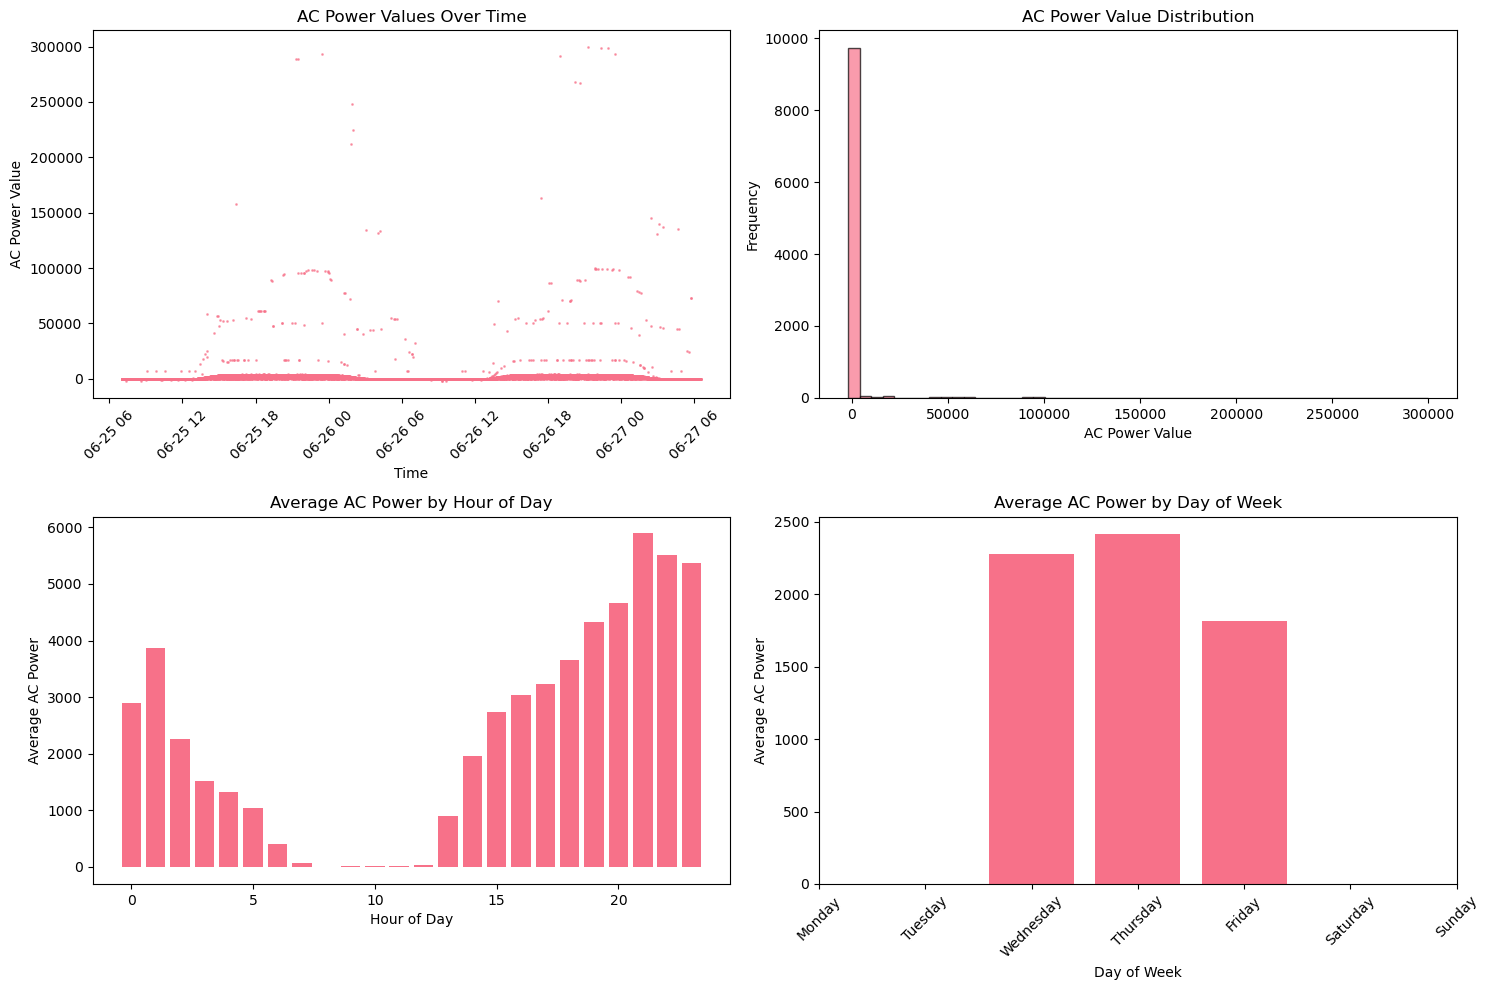

In [18]:
# Analyze AC_POWER metrics over time
ac_power_data = df[df['metric'].str.contains('AC_POWER', case=False)].copy()

if len(ac_power_data) > 0:
    # Sample data for plotting (to avoid memory issues)
    sample_size = min(10000, len(ac_power_data))
    ac_power_sample = ac_power_data.sample(n=sample_size, random_state=42)
    
    plt.figure(figsize=(15, 10))
    
    # Plot 1: AC Power over time
    plt.subplot(2, 2, 1)
    plt.scatter(ac_power_sample['event_utc_time'], ac_power_sample['value'], alpha=0.6, s=1)
    plt.title('AC Power Values Over Time')
    plt.xlabel('Time')
    plt.ylabel('AC Power Value')
    plt.xticks(rotation=45)
    
    # Plot 2: AC Power distribution
    plt.subplot(2, 2, 2)
    plt.hist(ac_power_sample['value'], bins=50, alpha=0.7, edgecolor='black')
    plt.title('AC Power Value Distribution')
    plt.xlabel('AC Power Value')
    plt.ylabel('Frequency')
    
    # Plot 3: AC Power by hour of day
    plt.subplot(2, 2, 3)
    hourly_power = ac_power_sample.groupby('hour')['value'].mean()
    plt.bar(hourly_power.index, hourly_power.values)
    plt.title('Average AC Power by Hour of Day')
    plt.xlabel('Hour of Day')
    plt.ylabel('Average AC Power')
    
    # Plot 4: AC Power by day of week
    plt.subplot(2, 2, 4)
    daily_power = ac_power_sample.groupby('day_of_week')['value'].mean()
    days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    daily_power = daily_power.reindex(days_order)
    plt.bar(range(len(daily_power)), daily_power.values)
    plt.title('Average AC Power by Day of Week')
    plt.xlabel('Day of Week')
    plt.ylabel('Average AC Power')
    plt.xticks(range(len(daily_power)), daily_power.index, rotation=45)
    
    plt.tight_layout()
    plt.show()


## 6. Site Analysis


In [19]:
# Site analysis
print("Site Analysis:")
print("=" * 50)

site_summary = df.groupby(['site_id', 'site_name', 'site_latitude', 'site_longitude', 'site_ac_capacity']).agg({
    'device_id': 'nunique',
    'event_utc_time': ['min', 'max'],
    'value': ['count', 'mean', 'std']
}).round(4)

site_summary.columns = ['device_count', 'start_date', 'end_date', 'data_points', 'avg_value', 'std_value']
site_summary = site_summary.reset_index()

print(f"Total sites: {len(site_summary)}")
print(f"\nSite summary statistics:")
print(site_summary.describe())

print(f"\nTop 10 sites by data points:")
print(site_summary.nlargest(10, 'data_points')[['site_id', 'site_name', 'device_count', 'data_points', 'avg_value']])


Site Analysis:
Total sites: 1

Site summary statistics:
       site_latitude  site_longitude  site_ac_capacity  device_count  \
count       1.000000        1.000000               1.0           1.0   
mean       36.226944     -119.893889           50496.0         520.0   
std              NaN             NaN               NaN           NaN   
min        36.226944     -119.893889           50496.0         520.0   
25%        36.226944     -119.893889           50496.0         520.0   
50%        36.226944     -119.893889           50496.0         520.0   
75%        36.226944     -119.893889           50496.0         520.0   
max        36.226944     -119.893889           50496.0         520.0   

       data_points     avg_value     std_value  
count          1.0  1.000000e+00  1.000000e+00  
mean     3280232.0  1.537759e+06  4.544096e+07  
std            NaN           NaN           NaN  
min      3280232.0  1.537759e+06  4.544096e+07  
25%      3280232.0  1.537759e+06  4.544096e+07  
5

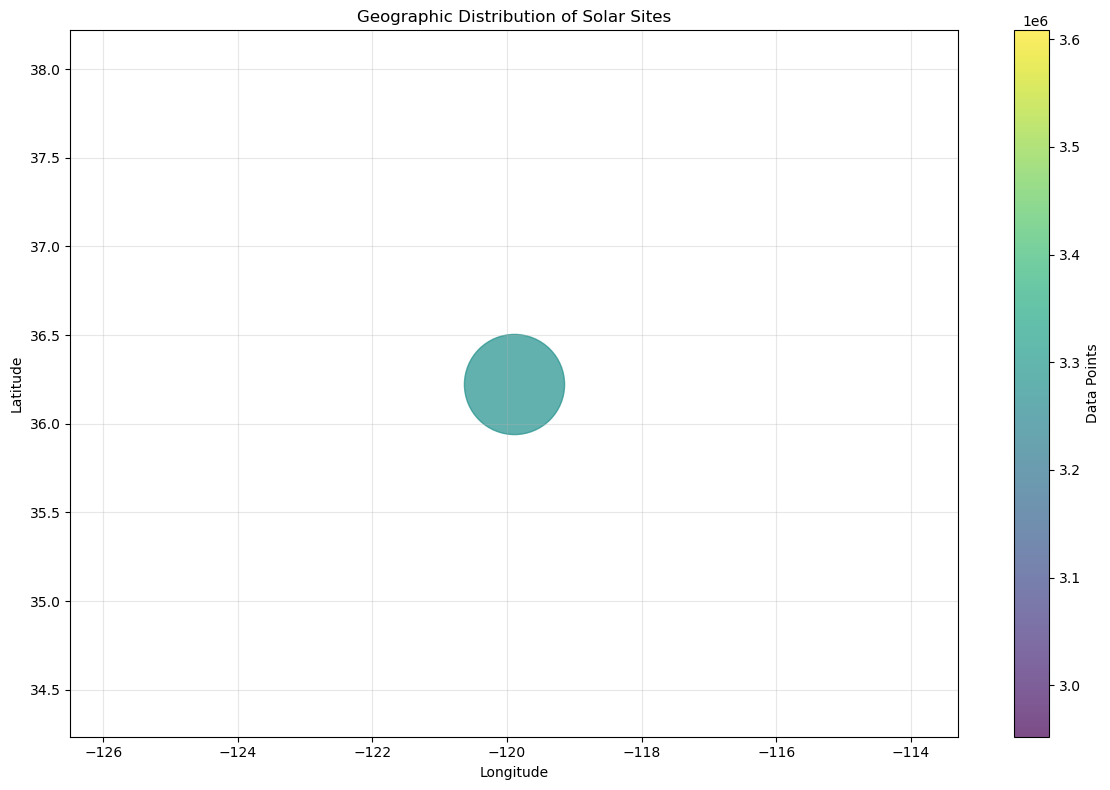

In [20]:
# Geographic distribution of sites
plt.figure(figsize=(12, 8))
plt.scatter(site_summary['site_longitude'], site_summary['site_latitude'], 
           s=site_summary['device_count']*10, alpha=0.7, c=site_summary['data_points'], cmap='viridis')
plt.colorbar(label='Data Points')
plt.title('Geographic Distribution of Solar Sites')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


## 7. Summary and Insights


In [21]:
# Generate summary insights
print("SUMMARY AND INSIGHTS")
print("=" * 50)

print(f"\n1. DATASET OVERVIEW:")
print(f"   - Total records: {len(df):,}")
print(f"   - Time span: {df['event_utc_time'].min()} to {df['event_utc_time'].max()}")
print(f"   - Unique devices: {df['device_id'].nunique():,}")
print(f"   - Unique sites: {df['site_id'].nunique():,}")
print(f"   - Unique metrics: {df['metric'].nunique():,}")

print(f"\n2. DATA QUALITY:")
print(f"   - Missing values: {df.isnull().sum().sum()}")
duplicates = df.duplicated().sum()
print(f"   - Duplicate records: {duplicates:,}")

print(f"\n3. PERFORMANCE METRICS:")
ac_power_metrics = df[df['metric'].str.contains('AC_POWER', case=False)]
if len(ac_power_metrics) > 0:
    print(f"   - AC Power records: {len(ac_power_metrics):,}")
    print(f"   - AC Power range: {ac_power_metrics['value'].min():.2f} - {ac_power_metrics['value'].max():.2f}")
    print(f"   - AC Power mean: {ac_power_metrics['value'].mean():.2f}")

energy_metrics = df[df['metric'].str.contains('ENERGY', case=False)]
if len(energy_metrics) > 0:
    print(f"   - Energy records: {len(energy_metrics):,}")
    print(f"   - Energy range: {energy_metrics['value'].min():.2f} - {energy_metrics['value'].max():.2f}")
    print(f"   - Energy mean: {energy_metrics['value'].mean():.2f}")

print(f"\n4. GEOGRAPHIC DISTRIBUTION:")
print(f"   - Sites span latitude: {df['site_latitude'].min():.4f} to {df['site_latitude'].max():.4f}")
print(f"   - Sites span longitude: {df['site_longitude'].min():.4f} to {df['site_longitude'].max():.4f}")
print(f"   - Total AC capacity: {df['site_ac_capacity'].sum():,.0f}")

print(f"\n5. TEMPORAL PATTERNS:")
print(f"   - Average daily data points: {daily_counts.mean():.0f}")
print(f"   - Peak hour: {hourly_counts.idxmax()}:00")
print(f"   - Most active day: {df['day_of_week'].value_counts().index[0]}")


SUMMARY AND INSIGHTS

1. DATASET OVERVIEW:
   - Total records: 3,311,791
   - Time span: 2025-06-25 07:00:00+00:00 to 2025-06-27 06:55:00+00:00
   - Unique devices: 520
   - Unique sites: 1
   - Unique metrics: 185

2. DATA QUALITY:
   - Missing values: 32130
   - Duplicate records: 0

3. PERFORMANCE METRICS:
   - AC Power records: 274,795
   - AC Power range: -2392.69 - 300150.00
   - AC Power mean: 2243.03
   - Energy records: 584,468
   - Energy range: -20.61 - 2548009730.00
   - Energy mean: 8025430.43

4. GEOGRAPHIC DISTRIBUTION:
   - Sites span latitude: 36.2269 to 36.2269
   - Sites span longitude: -119.8939 to -119.8939
   - Total AC capacity: 167,232,198,336

5. TEMPORAL PATTERNS:
   - Average daily data points: 1103930
   - Peak hour: 0:00
   - Most active day: Thursday


## 8. Recommendations for Further Analysis

Based on the initial exploration, here are some recommendations for deeper analysis:

1. **Performance Trend Analysis**: Analyze how device performance changes over time
2. **Anomaly Detection**: Identify unusual patterns in device behavior
3. **Predictive Modeling**: Build models to predict device failures or performance issues
4. **Correlation Analysis**: Study relationships between different metrics
5. **Seasonal Analysis**: Examine how performance varies with seasons
6. **Site Comparison**: Compare performance across different sites
7. **Maintenance Optimization**: Identify patterns that could inform maintenance schedules

The dataset appears to be comprehensive and well-structured, making it suitable for various advanced analytics applications.
